## Template Matching
By: Shawn Vosburg (260743167)  
Due: October 8th, 2018  
Class: ECSE 415, McGill University  
Assignment 1, template_matching.ipynb  

# Question 3.1
*Given a reference image (scene of an amusement park) and a template
image (face of Waldo), iterate over all pixel locations of reference image
and compare the local patch with template image using sum of square
distance (SSD) metric. Display SSD for whole image. Find the location
((x, y) coordinate) where the SSD is minimum and see if you can find
Waldo there.*

[[0.7607551  0.71016455 0.716979   ... 0.6986022  0.7133644  0.7232327 ]
 [0.7517319  0.71872497 0.72128046 ... 0.7082771  0.7049565  0.7106371 ]
 [0.73687327 0.69760966 0.69733363 ... 0.7153415  0.6908961  0.6993162 ]
 ...
 [0.39958954 0.40263185 0.4051581  ... 0.67105657 0.6718913  0.6695865 ]
 [0.40150622 0.40209317 0.40503618 ... 0.6768295  0.6740168  0.6679864 ]
 [0.40165952 0.39826787 0.39948502 ... 0.65469426 0.6417703  0.6336712 ]]


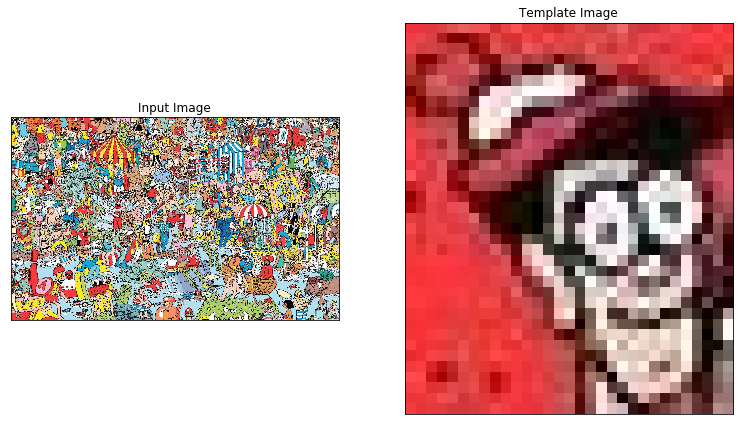

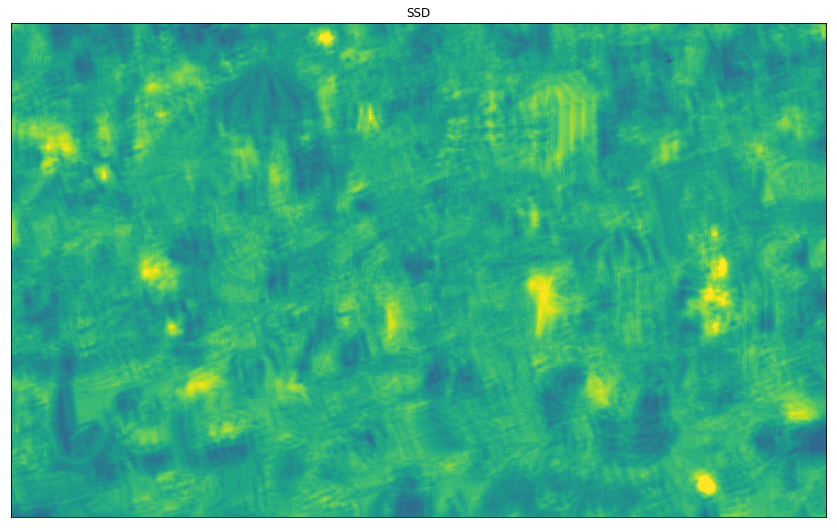

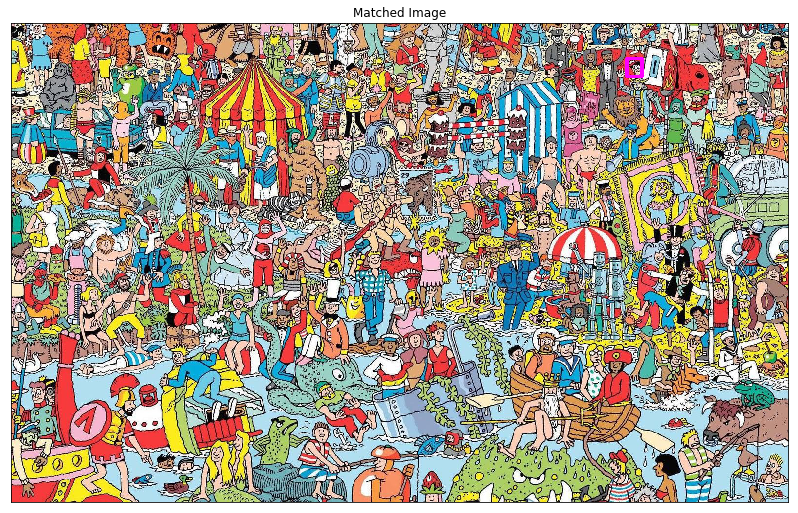

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load image
img = cv2.imread("where_is_waldo.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# create copy
img_disp = img.copy()

# Read a template from one of the resistors
temp = cv2.imread("template1.png")
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)

ht, wt = temp.shape[0:2]

# apply template matching
# cv2.matchTemplate(image, templ, method) → result
res = cv2.matchTemplate(img, temp, method=cv2.TM_SQDIFF_NORMED)
print(res)
# set a threshold
thres = 0.1
# find all points above threshold
loc = np.where(res <= thres)
# loop though the points
for pt in zip(*loc[::-1]):
    # cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None
    cv2.rectangle(img_disp, pt, (pt[0]+wt, pt[1]+ht), (255,0,255), 5)

# display images
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(temp)
plt.title("Template Image"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(211), plt.imshow(res)
plt.title("SSD"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(30,30))
plt.subplot(311), plt.imshow(img_disp)
plt.title("Matched Image"), plt.xticks([]), plt.yticks([])
plt.show()

# Question 3.2
*Repeat above process with the noisy template as shown in Figure 3(c).*

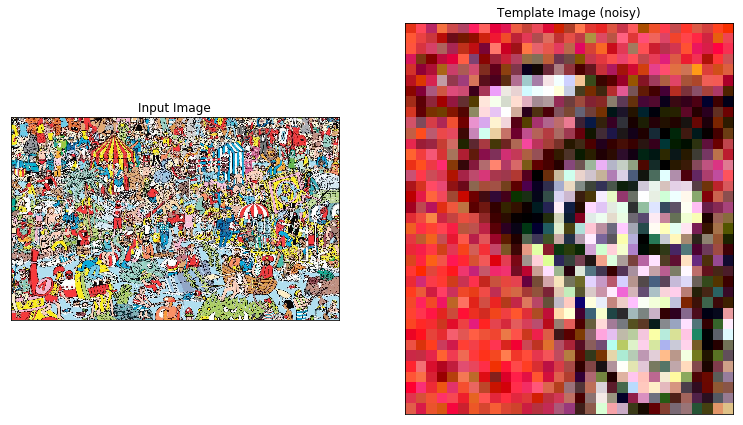

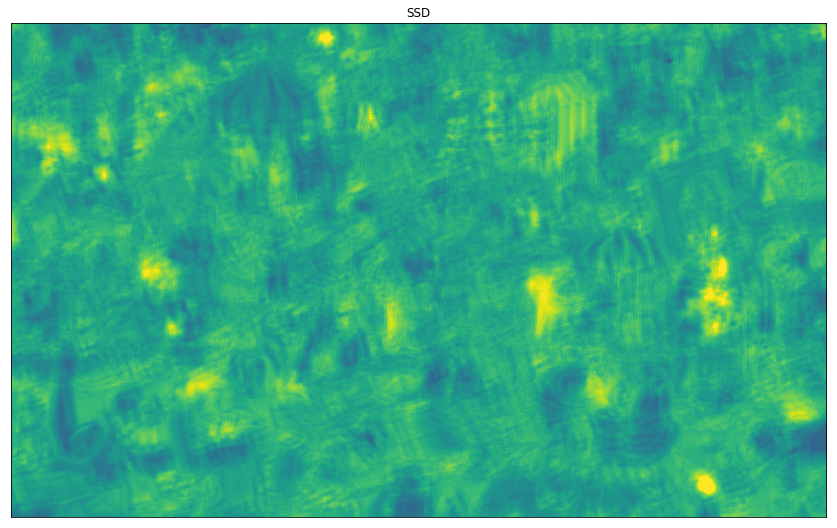

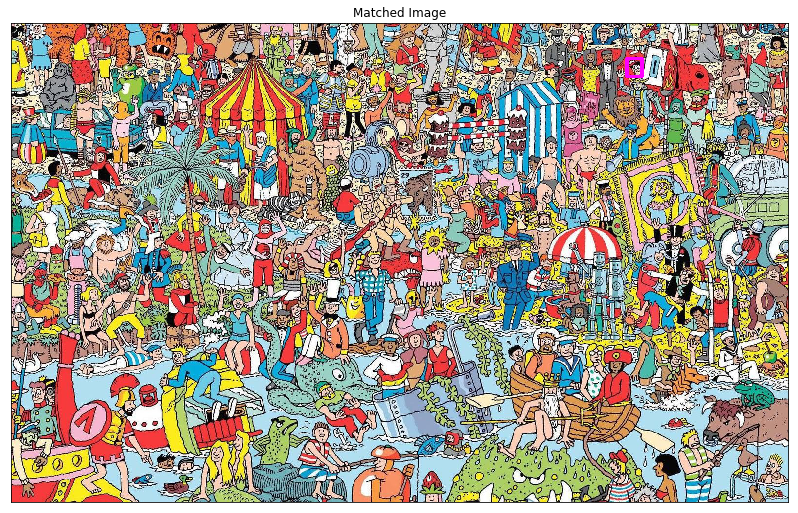

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load image
img = cv2.imread("where_is_waldo.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# create copy
img_disp = img.copy()

# Read a template from one of the resistors
temp = cv2.imread("template2.png") #Load noisy template
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)

ht, wt = temp.shape[0:2]

# apply template matching
# cv2.matchTemplate(image, templ, method) → result
res = cv2.matchTemplate(img, temp, cv2.TM_SQDIFF_NORMED)

# set a threshold
thres = 0.1
# find all points above threshold
loc = np.where(res <= thres)
# loop though the points
for pt in zip(*loc[::-1]):
    # cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None
    cv2.rectangle(img_disp, pt, (pt[0]+wt, pt[1]+ht), (255,0,255), 5)

# display images
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(temp)
plt.title("Template Image (noisy)"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(211), plt.imshow(res)
plt.title("SSD"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(30,30))
plt.subplot(311), plt.imshow(img_disp)
plt.title("Matched Image"), plt.xticks([]), plt.yticks([])
plt.show()